<a href="https://colab.research.google.com/github/Subhamtr01/Maruti_RAC/blob/main/Maruti_RAC_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maruti Pricing/Marketing Dataset Analysis

**Dependencies**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform
# 1.12 Misc
import time
import os
import gc
import random
# 1.0.2
from pathlib import Path
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#from google.colab import drive
#drive.mount('/drive')

**Get Data**

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Subhamtr01/Rac/main/Maruti_transformed.csv")
df.head()

,Car_model,Car_version,Price(Rs),DIMENSIONS_Length(mm),DIMENSIONS_Width(mm),DIMENSIONS_Height(mm),DIMENSIONS_Wheelbase(mm),DIMENSIONS_Ground Clearance(mm),DIMENSIONS_Kerb Weight(kg),DIMENSIONS_Boot Capacity(litres),...,PERFORMANCE AS TESTED_Performance 40 to 100 kph Fourth Gear Kickdown,FUEL ECONOMY/RANGE_City Fuel Economy Tested,FUEL ECONOMY/RANGE_Highway Fuel Economy Tested,ENGINE/MOTOR_Combined Max Power,SEATS AND UPHOLSTERY_Third Row Seats Fold,SEATS AND UPHOLSTERY_Third Row Seats Split,FUEL ECONOMY/RANGE_Cng Lpg Tank Capacity,ENGINE/MOTOR_Combined Max Torque,ENGINE/MOTOR_Max Engine Power Cng,ENGINE/MOTOR_Max Engine Torque Cng
0,Audi A4,40 TFSI Premium Plus,5567000.0,4762,1847,1433,2819.0,NaN,1550,460.0,...,5.52 s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Audi A4,40 TFSI Technology,6004000.0,4762,1847,1433,2819.0,NaN,1555,460.0,...,5.52 s,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Audi A5 Sportback,RS5 Quattro 2.9 Petrol,13000000.0,4783,1866,1387,2826.0,NaN,1810,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi A5 Sportback,S5 Quattro 3.0 Petrol,8763000.0,4765,1845,1390,2825.0,NaN,1760,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Audi A6,45 TFSI Premium Plus,6302000.0,4939,1886,1457,2924.0,NaN,1780,530.0,...,NaN,NaN,NaN,245hp at 5000-6000rpm,NaN,NaN,NaN,370Nm at 1600-4500rpm,NaN,NaN


In [ ]:
columns_to_drop = ['WHEELS AND TYRES_Front Tyre Size', 'WHEELS AND TYRES_Rear Tyre Size','ENGINE/MOTOR_Combined Max Power','ENGINE/MOTOR_Combined Max Torque']
df = df.drop(columns=columns_to_drop)

In [ ]:
df_cat =   df[['ENGINE/MOTOR_Fuel Type Propulsion','ENGINE/MOTOR_Engine Installation','ENGINE/MOTOR_Engine Type','TRANSMISSION_Drive Layout',
                 'TRANSMISSION_Gearbox Type', 'TRANSMISSION_Number Of Gears','TRANSMISSION_Selectable Differential Lock', 'SUSPENSION_Front Suspension Type',
                 'SUSPENSION_Front Springs','SUSPENSION_Rear Suspension Type','SUSPENSION_Rear Springs','SUSPENSION_Damper Control','SUSPENSION_Ride Height Adjust',
                 'STEERING_Type Of Power Assist','STEERING_Steering Adjust','STEERING_Steering Adjust Type','WHEELS AND TYRES_Wheels','WHEELS AND TYRES_Wheel Size',
                 'WHEELS AND TYRES_Spare Wheel','BRAKES_Front Brakes','BRAKES_Rear Brakes','SAFETY_Airbags','SAFETY_Anti Lock Brakes Abs','SAFETY_Electronic Parking Brake',
                 'SAFETY_Hill Start Assist','SAFETY_Hill Descent Control','SAFETY_Anti Pinch Power Windows','SAFETY_Central Locking','SAFETY_Speed Sensing Auto Door Locks',
                 'SAFETY_Child Safety Lock','SAFETY_Isofix Child Seat Mounts','SAFETY_Automatic Headlamps','SAFETY_Automatic Wipers','SAFETY_Rear Washer Wiper','SAFETY_Rear Defogger',
                 'SAFETY_Day Night Interior Mirror','SAFETY_Parking Sensors','SAFETY_Parking Camera','SAFETY_Parking Camera',
                 'SAFETY_Tyre Pressure Monitoring System','SAFETY_Blind Spot Monitor',
                 'SAFETY_Adaptive Cruise Control','EXTERIOR_Body Coloured Bumpers','EXTERIOR_Projector Headlamps','EXTERIOR_Headlight Type','EXTERIOR_Daytime Running Lights',
                 'EXTERIOR_Front Fog Lamps',
                 'SEATS AND UPHOLSTERY_Seats','SEATS AND UPHOLSTERY_Leather Wrapped Steering Wheel','SEATS AND UPHOLSTERY_Leather Wrapped Gear Knob',
                 'SEATS AND UPHOLSTERY_Drivers Seat Height Adjust',
                 'SEATS AND UPHOLSTERY_Electric Adjust For Drivers Seat','SEATS AND UPHOLSTERY_Drivers Seat Memory',
                 'SEATS AND UPHOLSTERY_Front Passenger Seat Height Adjust','SEATS AND UPHOLSTERY_Electric Adjust For Front Passenger Seat',
                 'SEATS AND UPHOLSTERY_Front Passenger Seat Memory','SEATS AND UPHOLSTERY_Adjustable Front Headrests','SEATS AND UPHOLSTERY_Ventilated Seats',
                 'SEATS AND UPHOLSTERY_Heated Seats','SEATS AND UPHOLSTERY_Massage Seats',
                 'SEATS AND UPHOLSTERY_Front Seat Armrest','SEATS AND UPHOLSTERY_Rear Seat Armrest','SEATS AND UPHOLSTERY_Adjustable Rear Headrests',
                 'SEATS AND UPHOLSTERY_Individual Chairs At Rear',
                 'SEATS AND UPHOLSTERY_Rear Seat Backrest Recline','SEATS AND UPHOLSTERY_Rear Seat Backrest Fold','SEATS AND UPHOLSTERY_Rear Seat Backrest Split',
                 'INFOTAINMENT_Audio System','INFOTAINMENT_Cd Player',
                 'INFOTAINMENT_Usb Input','INFOTAINMENT_Aux Input','INFOTAINMENT_Bluetooth Audio Streaming','INFOTAINMENT_Bluetooth Telephone Function',
                 'INFOTAINMENT_Steering Audio Controls','INFOTAINMENT_Steering Phone Controls','INFOTAINMENT_Wireless Phone Charging',
                 'INFOTAINMENT_Display','INFOTAINMENT_Android Auto','INFOTAINMENT_Apple Carplay', 'INFOTAINMENT_Satellite Navigation',
                 'INFOTAINMENT_Voice Coands','INFOTAINMENT_Gesture Controls','INFOTAINMENT_Touchpad','INFOTAINMENT_Rear Entertainment Screens',
                 'COMFORT AND CONVENIENCE_Power Windows','COMFORT AND CONVENIENCE_Power Windows With One Touch Down','COMFORT AND CONVENIENCE_Power Windows With One Touch Up',
                 'COMFORT AND CONVENIENCE_Exterior Mirrors Electric Adjust','COMFORT AND CONVENIENCE_Exterior Mirrors Electric Fold',
                 'COMFORT AND CONVENIENCE_Remote Locking','COMFORT AND CONVENIENCE_Keyless Entry','COMFORT AND CONVENIENCE_Push Button Start',
                 'COMFORT AND CONVENIENCE_Climate Control','COMFORT AND CONVENIENCE_Rear Ac Vents','COMFORT AND CONVENIENCE_Third Row Ac Vents',
                 'COMFORT AND CONVENIENCE_Front Passenger Seat Adjust From Rear',
                 'COMFORT AND CONVENIENCE_Rear Window Sun Shades','COMFORT AND CONVENIENCE_Rear Windscreen Sun Shade',
                 'COMFORT AND CONVENIENCE_Rear Power Outlet','COMFORT AND CONVENIENCE_Sunroof','COMFORT AND CONVENIENCE_Configurable Ambient Lighting',
                 'COMFORT AND CONVENIENCE_Driving Modes','COMFORT AND CONVENIENCE_Cruise Control','COMFORT AND CONVENIENCE_Auto Parking','COMFORT AND CONVENIENCE_Launch Control',
                 'COMFORT AND CONVENIENCE_Dead Pedal','COMFORT AND CONVENIENCE_Hands Free Boot Opening','INSTRUMENTATION_Speedometer','INSTRUMENTATION_Tachometer',
                 'INSTRUMENTATION_Trip Meter','INSTRUMENTATION_Average Fuel Consumption','INSTRUMENTATION_Distance To Empty',
                 'INSTRUMENTATION_Low Fuel Level Warning','INSTRUMENTATION_Gear Indicator',
                 'INSTRUMENTATION_Shift Indicator','INSTRUMENTATION_Head Up Display','FUEL ECONOMY/RANGE_Auto Start Stop',
                 'SAFETY_Electronic Brakeforce Distribution Ebd',
                 'SAFETY_Electronic Stability Control','INFOTAINMENT_Mirrorlink','INFOTAINMENT_Web Browser','INFOTAINMENT_Video Player','INSTRUMENTATION_Average Speed',
                 'INSTRUMENTATION_Instantaneous Consumption','TRANSMISSION_Sport Mode Automatic Gearbox',
                 'TRANSMISSION_Paddle Shifters Automatic Gearbox', 'TRANSMISSION_Manual Shifts Via Gear Lever Automatic Gearbox','SEATS AND UPHOLSTERY_Third Row Seats Fold','SEATS AND UPHOLSTERY_Third Row Seats Split']]

In [ ]:
dummy_FT = pd.get_dummies(df['ENGINE/MOTOR_Fuel Type Propulsion'])
dummy_ET = pd.get_dummies(df['ENGINE/MOTOR_Engine Type'])
dummy_TDL = pd.get_dummies(df['TRANSMISSION_Drive Layout'])
dummy_FST = pd.get_dummies(df['SUSPENSION_Front Suspension Type'])
dummy_RST = pd.get_dummies(df['SUSPENSION_Rear Suspension Type'])
dummy_PA = pd.get_dummies(df['STEERING_Type Of Power Assist'])
dummy_TW = pd.get_dummies(df['WHEELS AND TYRES_Wheels'])
dummy_SU = pd.get_dummies(df['SEATS AND UPHOLSTERY_Seats'])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["ENGINE/MOTOR_Fuel Type Propulsion", "ENGINE/MOTOR_Engine Installation","ENGINE/MOTOR_Engine Displacement(cc)","ENGINE/MOTOR_Engine Type", "TRANSMISSION_Drive Layout", "TRANSMISSION_Gearbox Type",
                       "TRANSMISSION_Selectable Differential Lock", "SUSPENSION_Front Suspension Type", "SUSPENSION_Front Springs", "SUSPENSION_Rear Suspension Type",
                       "SUSPENSION_Rear Springs","SUSPENSION_Damper Control","SUSPENSION_Ride Height Adjust","STEERING_Type Of Power Assist","STEERING_Steering Adjust","STEERING_Steering Adjust Type","WHEELS AND TYRES_Wheels", "WHEELS AND TYRES_Spare Wheel", "BRAKES_Front Brakes", "BRAKES_Rear Brakes", "SAFETY_Day Night Interior Mirror",
                       "SAFETY_Parking Sensors", "SAFETY_Parking Camera", "EXTERIOR_Headlight Type", "EXTERIOR_Daytime Running Lights", "SEATS AND UPHOLSTERY_Seats", "SEATS AND UPHOLSTERY_Ventilated Seats", "SEATS AND UPHOLSTERY_Heated Seats", "SEATS AND UPHOLSTERY_Massage Seats",
                      "SEATS AND UPHOLSTERY_Individual Chairs At Rear", "SEATS AND UPHOLSTERY_Rear Seat Backrest Recline",
                       "INFOTAINMENT_Satellite Navigation", "COMFORT AND CONVENIENCE_Power Windows", "COMFORT AND CONVENIENCE_Power Windows With One Touch Down", "COMFORT AND CONVENIENCE_Power Windows With One Touch Up",
                       "COMFORT AND CONVENIENCE_Sunroof", "INSTRUMENTATION_Speedometer","INSTRUMENTATION_Tachometer", "FUEL ECONOMY/RANGE_Auto Start Stop",
                       "TRANSMISSION_Sport Mode Automatic Gearbox","TRANSMISSION_Manual Shifts Via Gear Lever Automatic Gearbox","TRANSMISSION_Paddle Shifters Automatic Gearbox",]
label_encoder = LabelEncoder()
for column in categorical_columns:
    if column in df.columns:
        df[column] = df[column].astype(str)
        df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,Car_model,Car_version,Price(Rs),DIMENSIONS_Length(mm),DIMENSIONS_Width(mm),DIMENSIONS_Height(mm),DIMENSIONS_Wheelbase(mm),DIMENSIONS_Ground Clearance(mm),DIMENSIONS_Kerb Weight(kg),DIMENSIONS_Boot Capacity(litres),...,PERFORMANCE AS TESTED_Performance 0 to 100 kph,PERFORMANCE AS TESTED_Performance 20 to 80 kph Third Gear Kickdown,PERFORMANCE AS TESTED_Performance 40 to 100 kph Fourth Gear Kickdown,FUEL ECONOMY/RANGE_City Fuel Economy Tested,FUEL ECONOMY/RANGE_Highway Fuel Economy Tested,SEATS AND UPHOLSTERY_Third Row Seats Fold,SEATS AND UPHOLSTERY_Third Row Seats Split,FUEL ECONOMY/RANGE_Cng Lpg Tank Capacity,ENGINE/MOTOR_Max Engine Power Cng,ENGINE/MOTOR_Max Engine Torque Cng
0,Audi A4,40 TFSI Premium Plus,5567000.0,4762,1847,1433,2819.0,NaN,1550,460.0,...,7.19 s,4.29 s,5.52 s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Audi A4,40 TFSI Technology,6004000.0,4762,1847,1433,2819.0,NaN,1555,460.0,...,7.19 s,4.29 s,5.52 s,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Audi A5 Sportback,RS5 Quattro 2.9 Petrol,13000000.0,4783,1866,1387,2826.0,NaN,1810,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Audi A5 Sportback,S5 Quattro 3.0 Petrol,8763000.0,4765,1845,1390,2825.0,NaN,1760,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Audi A6,45 TFSI Premium Plus,6302000.0,4939,1886,1457,2924.0,NaN,1780,530.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Volkswagen Virtus,1.0 TSI Petrol Highline AT,1711000.0,4561,1752,1507,2651.0,179.0,1225,1050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,Volkswagen Virtus,1.0 TSI Petrol Highline MT,1560000.0,4561,1752,1507,2651.0,179.0,1190,1050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,Volkswagen Virtus,1.0 TSI Petrol Topline AT,1886000.0,4561,1752,1507,2651.0,179.0,1245,1050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,Volkswagen Virtus,1.0 TSI Petrol Topline MT,1736000.0,4561,1752,1507,2651.0,179.0,1290,1050.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged = pd.concat([df_cat,dummy_FT,dummy_ET,dummy_TDL,dummy_FST,dummy_RST,dummy_PA,dummy_TW,dummy_SU],axis='columns')
merged.columns

Index(['ENGINE/MOTOR_Fuel Type Propulsion', 'ENGINE/MOTOR_Engine Installation',
       'ENGINE/MOTOR_Engine Type', 'TRANSMISSION_Drive Layout',
       'TRANSMISSION_Gearbox Type', 'TRANSMISSION_Number Of Gears',
       'TRANSMISSION_Selectable Differential Lock',
       'SUSPENSION_Front Suspension Type', 'SUSPENSION_Front Springs',
       'SUSPENSION_Rear Suspension Type',
       ...
       'Leather', 'Leather and Alcantara', 'Leather and Leatherette',
       'Leatherette', 'Leatherette and Fabric', 'Part-leather',
       'Part-leatherette', 'Semi-Fabric', 'Suede', 'Vinyl'],
      dtype='object', length=199)

In [ ]:
dropped_cat = merged.drop(['ENGINE/MOTOR_Fuel Type Propulsion','Petrol','ENGINE/MOTOR_Engine Type','3 cyls',
                       'TRANSMISSION_Drive Layout','All-Wheel Drive','SUSPENSION_Front Suspension Type', 'SUSPENSION_Rear Suspension Type','3-link Rigid Axle',
                       'STEERING_Type Of Power Assist','Electric','WHEELS AND TYRES_Wheels','Steel Rims with Wheel Covers','SEATS AND UPHOLSTERY_Seats','Alcantara'],axis='columns')

In [ ]:
df[['Kerb Weight Min', 'Kerb Weight Max']] = df['DIMENSIONS_Kerb Weight(kg)'].str.split('-', expand=True)





df['Kerb Weight Min'] = pd.to_numeric(df['Kerb Weight Min'], errors='coerce')

df['Kerb Weight Max'] = pd.to_numeric(df['Kerb Weight Max'], errors='coerce')



df['Kerb Weight Min'].fillna(df['Kerb Weight Max'], inplace=True)

df['Kerb Weight Max'].fillna(df['Kerb Weight Min'], inplace=True)

df.drop('DIMENSIONS_Kerb Weight(kg)', axis=1, inplace=True)

In [ ]:
df_noncat = df[['Price(Rs)','DIMENSIONS_Width(mm)', 'DIMENSIONS_Height(mm)', 'DIMENSIONS_Wheelbase(mm)', ' DIMENSIONS_Ground Clearance(mm)',
                   'Kerb Weight Min','Kerb Weight Max', 'DIMENSIONS_Boot Capacity(litres)','ENGINE/MOTOR_Engine Displacement(cc)',
                   'FUEL ECONOMY/RANGE_Fuel Tank Capacity','FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)','STEERING_Turning Radius(m)',
                   ]]

<Figure size 1000x600 with 0 Axes>

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Price(Rs)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Price(Rs)')

<Figure size 1000x600 with 0 Axes>

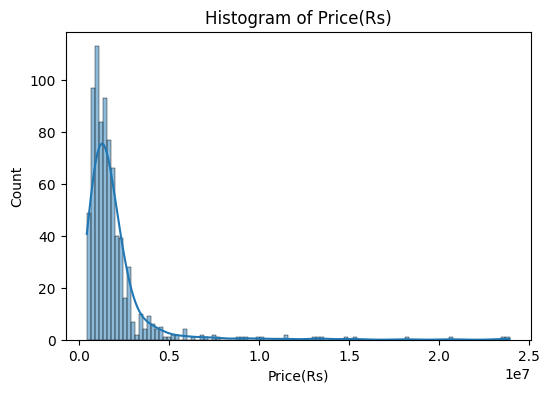

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='DIMENSIONS_Width(mm)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of DIMENSIONS_Width(mm)')

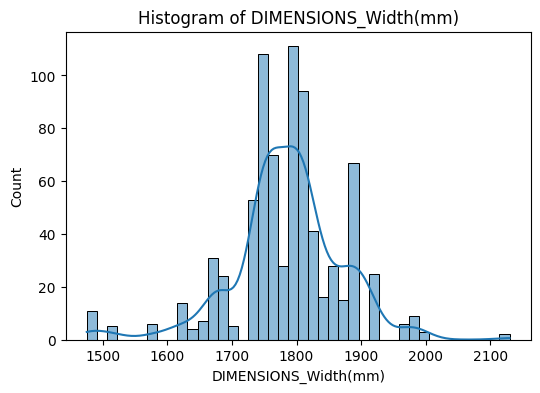

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='DIMENSIONS_Height(mm)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of DIMENSIONS_Height(mm)')

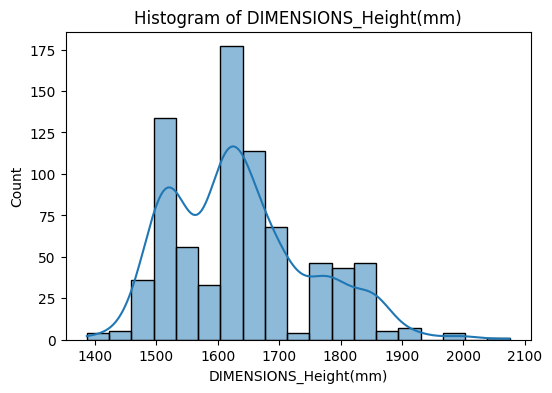

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='DIMENSIONS_Wheelbase(mm)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of DIMENSIONS_Wheelbase(mm)')

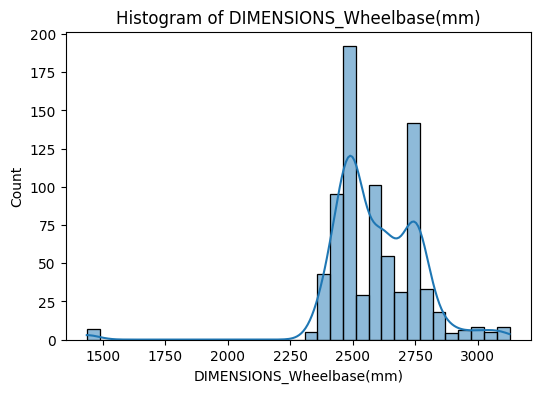

<Figure size 600x400 with 0 Axes>

<Axes: xlabel=' DIMENSIONS_Ground Clearance(mm)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of  DIMENSIONS_Ground Clearance(mm)')

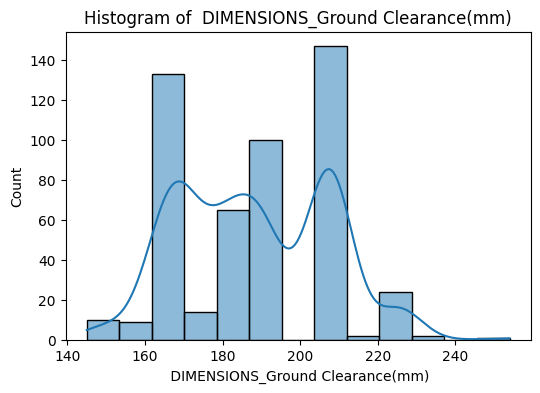

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Kerb Weight Min', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Kerb Weight Min')

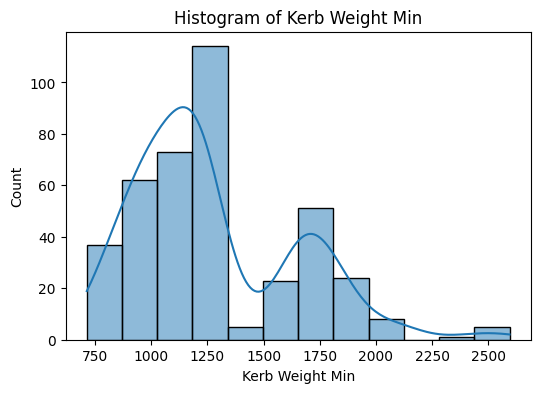

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='Kerb Weight Max', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of Kerb Weight Max')

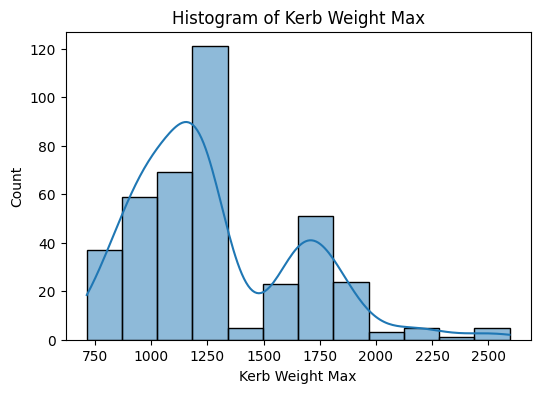

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='DIMENSIONS_Boot Capacity(litres)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of DIMENSIONS_Boot Capacity(litres)')

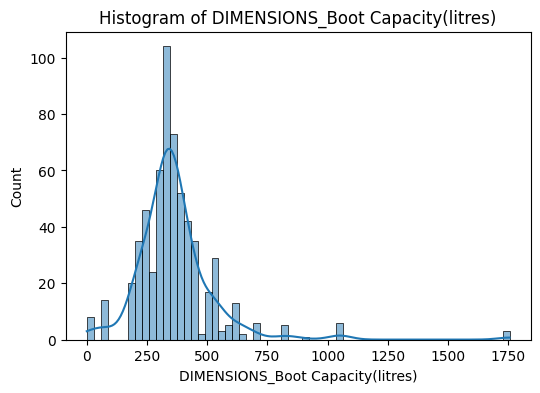

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='ENGINE/MOTOR_Engine Displacement(cc)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of ENGINE/MOTOR_Engine Displacement(cc)')

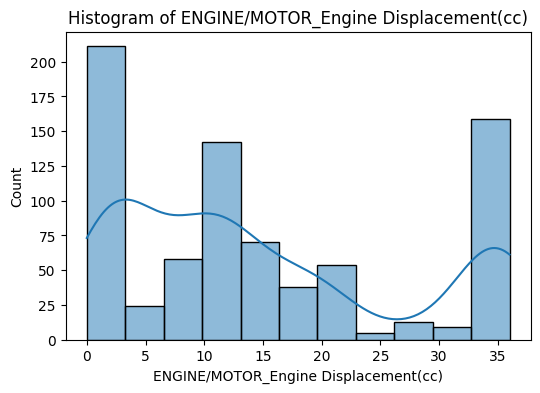

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='FUEL ECONOMY/RANGE_Fuel Tank Capacity', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of FUEL ECONOMY/RANGE_Fuel Tank Capacity')

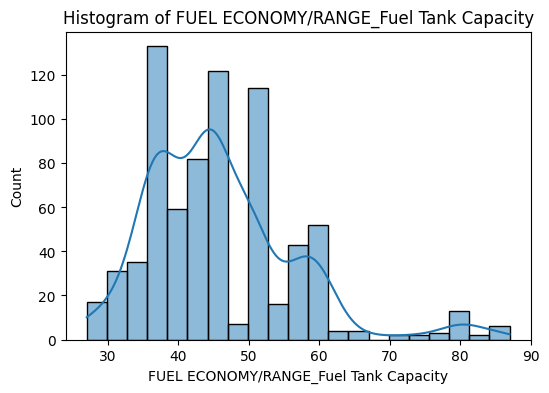

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)')

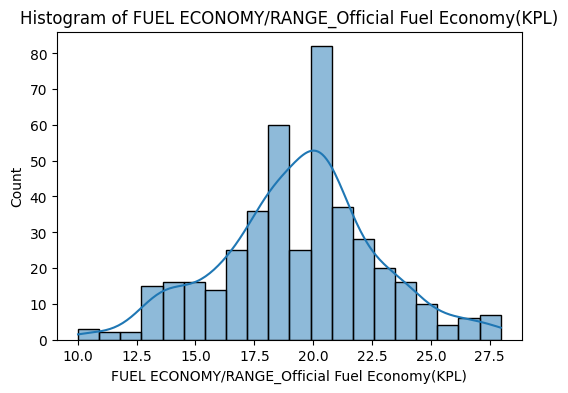

<Figure size 600x400 with 0 Axes>

<Axes: xlabel='STEERING_Turning Radius(m)', ylabel='Count'>

Text(0.5, 1.0, 'Histogram of STEERING_Turning Radius(m)')

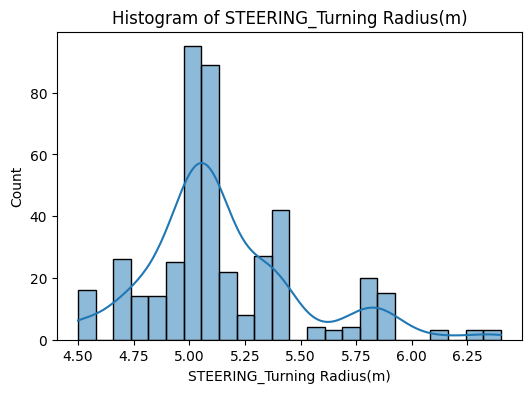

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 6))


# Plot histograms for individual columns
for column in df_noncat.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_noncat[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap')

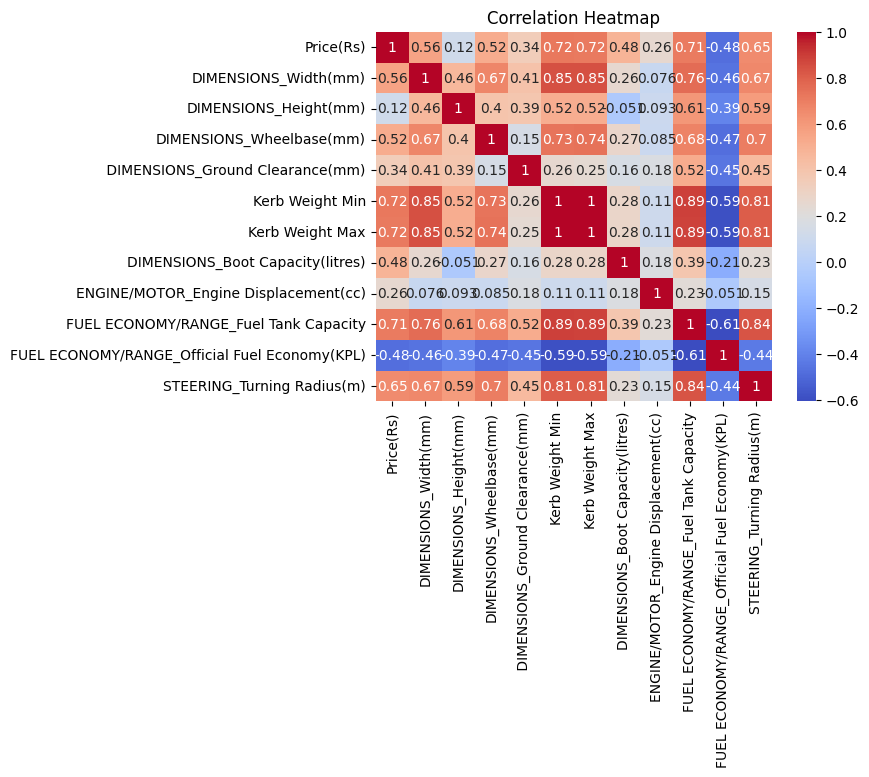

In [ ]:
correlation_matrix = df_noncat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<Axes: xlabel='ENGINE/MOTOR_Engine Type', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

Text(0.5, 1.0, 'Categorical Variable Counts')

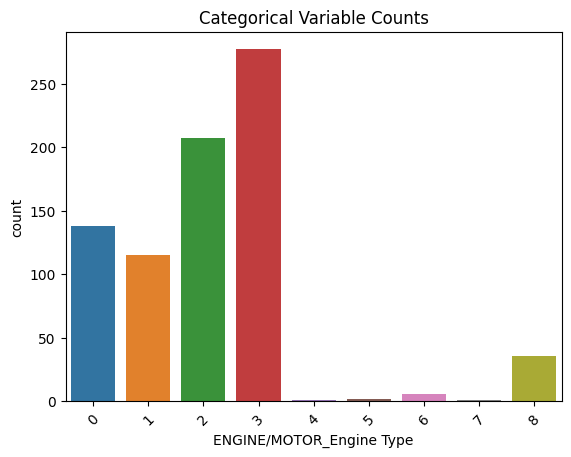

In [ ]:
sns.countplot(x='ENGINE/MOTOR_Engine Type', data=df)
plt.xticks(rotation=45)
plt.title('Categorical Variable Counts')
plt.show()

<Axes: xlabel='TRANSMISSION_Drive Layout', ylabel='count'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

Text(0.5, 1.0, 'TRANSMISSION_Drive Layout')

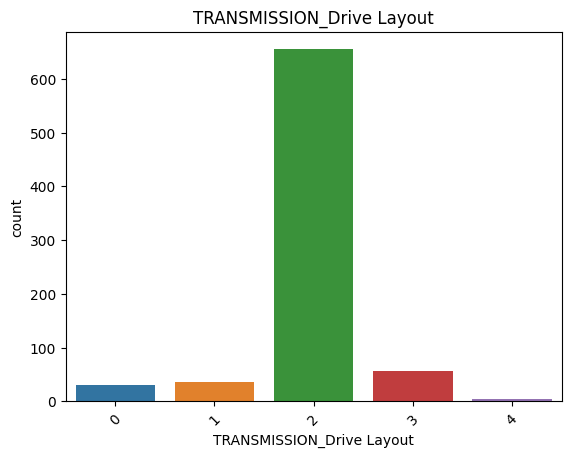

In [ ]:
sns.countplot(x='TRANSMISSION_Drive Layout', data=df)
plt.xticks(rotation=45)
plt.title('TRANSMISSION_Drive Layout')
plt.show()

<Axes: xlabel='TRANSMISSION_Gearbox Type', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14')])

Text(0.5, 1.0, 'TRANSMISSION_Gearbox Type Counts')

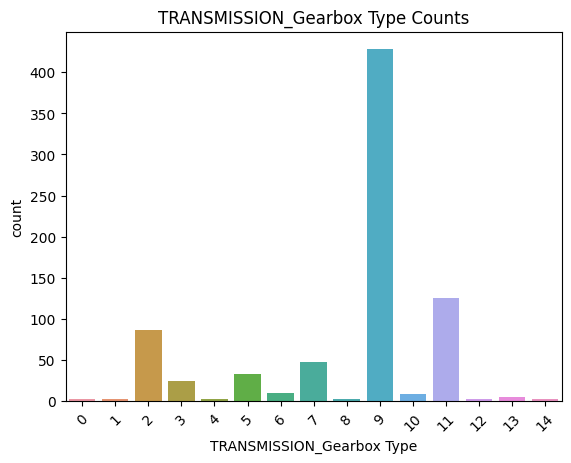

In [ ]:
sns.countplot(x='TRANSMISSION_Gearbox Type', data=df)
plt.xticks(rotation=45)
plt.title('TRANSMISSION_Gearbox Type Counts')
plt.show()

<Axes: xlabel='STEERING_Type Of Power Assist', ylabel='count'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

Text(0.5, 1.0, 'STEERING_Type Of Power Assist')

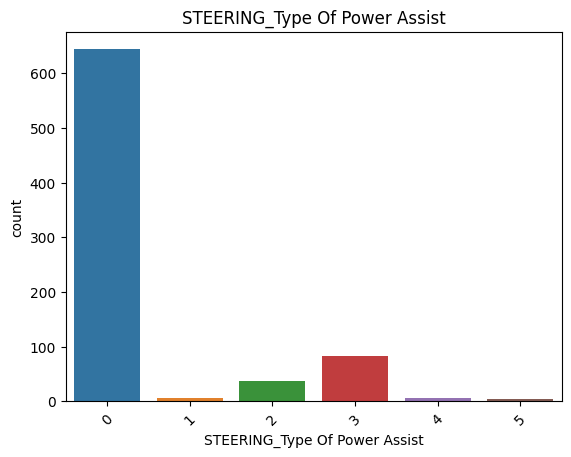

In [ ]:
sns.countplot(x='STEERING_Type Of Power Assist', data=df)
plt.xticks(rotation=45)
plt.title('STEERING_Type Of Power Assist')
plt.show()

<Axes: xlabel='WHEELS AND TYRES_Wheels', ylabel='count'>

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

Text(0.5, 1.0, 'WHEELS AND TYRES_Wheels count')

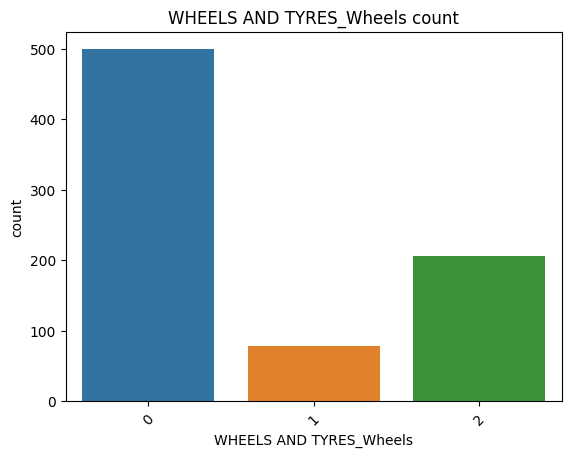

In [ ]:
sns.countplot(x='WHEELS AND TYRES_Wheels', data=df)
plt.xticks(rotation=45)
plt.title('WHEELS AND TYRES_Wheels count')
plt.show()

<Axes: xlabel='SEATS AND UPHOLSTERY_Seats', ylabel='count'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11')])

Text(0.5, 1.0, 'SEATS AND UPHOLSTERY_Seats count')

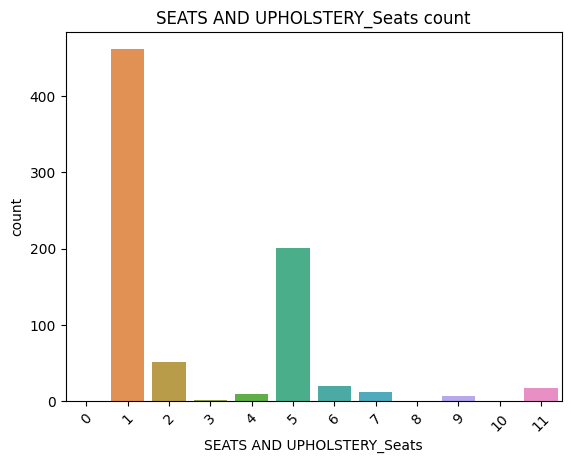

In [ ]:
sns.countplot(x='SEATS AND UPHOLSTERY_Seats', data=df)
plt.xticks(rotation=45)
plt.title('SEATS AND UPHOLSTERY_Seats count')
plt.show()

Analyzing column: Price(Rs)


<Axes: ylabel='Price(Rs)'>

Text(0.5, 1.0, 'Box Plot for Price(Rs)')

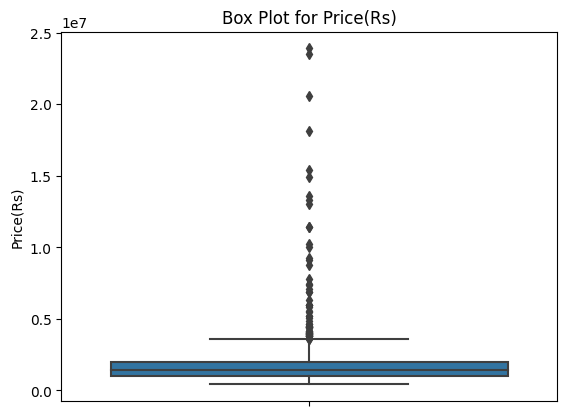

Analyzing column: DIMENSIONS_Width(mm)


<Axes: ylabel='DIMENSIONS_Width(mm)'>

Text(0.5, 1.0, 'Box Plot for DIMENSIONS_Width(mm)')

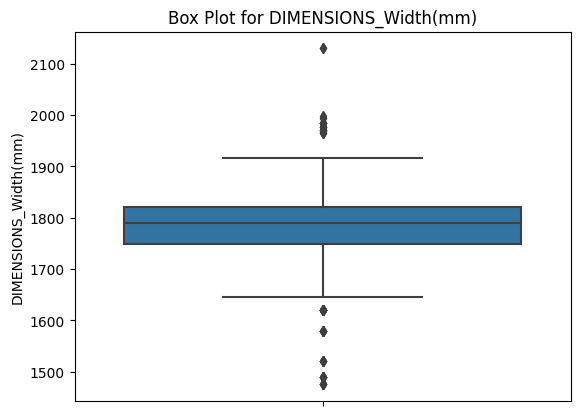

Analyzing column: DIMENSIONS_Height(mm)


<Axes: ylabel='DIMENSIONS_Height(mm)'>

Text(0.5, 1.0, 'Box Plot for DIMENSIONS_Height(mm)')

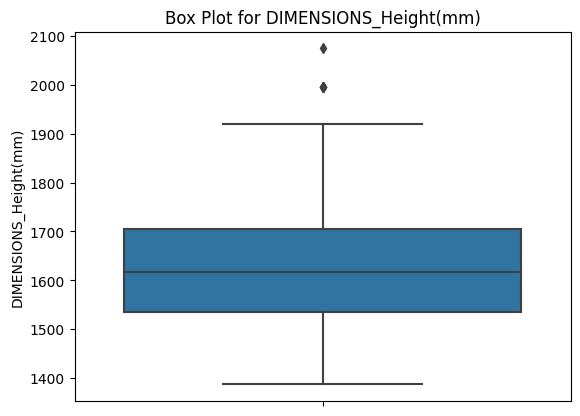

Analyzing column: DIMENSIONS_Wheelbase(mm)


<Axes: ylabel='DIMENSIONS_Wheelbase(mm)'>

Text(0.5, 1.0, 'Box Plot for DIMENSIONS_Wheelbase(mm)')

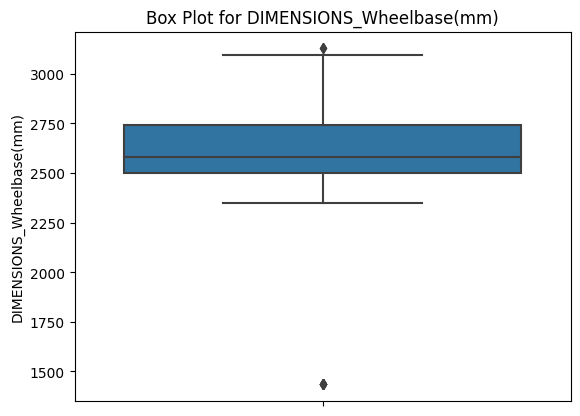

Analyzing column:  DIMENSIONS_Ground Clearance(mm)


<Axes: ylabel=' DIMENSIONS_Ground Clearance(mm)'>

Text(0.5, 1.0, 'Box Plot for  DIMENSIONS_Ground Clearance(mm)')

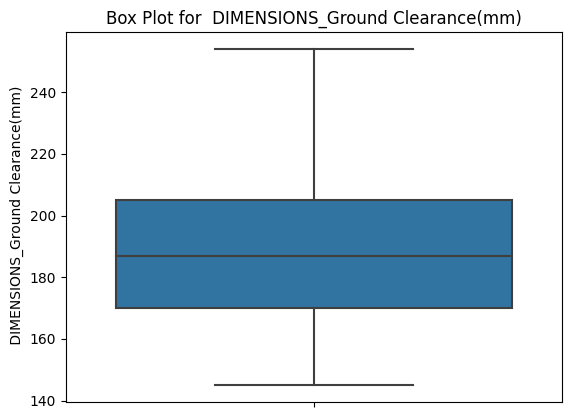

Analyzing column: Kerb Weight Min


<Axes: ylabel='Kerb Weight Min'>

Text(0.5, 1.0, 'Box Plot for Kerb Weight Min')

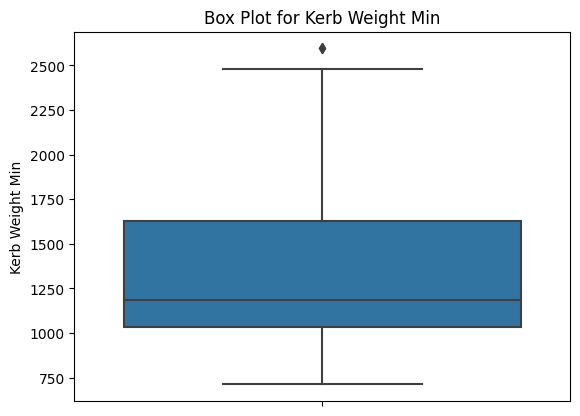

Analyzing column: Kerb Weight Max


<Axes: ylabel='Kerb Weight Max'>

Text(0.5, 1.0, 'Box Plot for Kerb Weight Max')

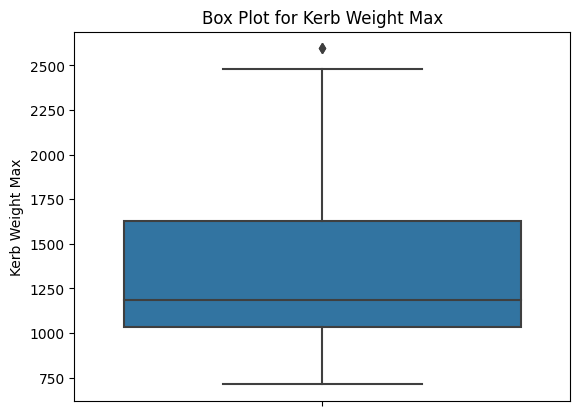

Analyzing column: DIMENSIONS_Boot Capacity(litres)


<Axes: ylabel='DIMENSIONS_Boot Capacity(litres)'>

Text(0.5, 1.0, 'Box Plot for DIMENSIONS_Boot Capacity(litres)')

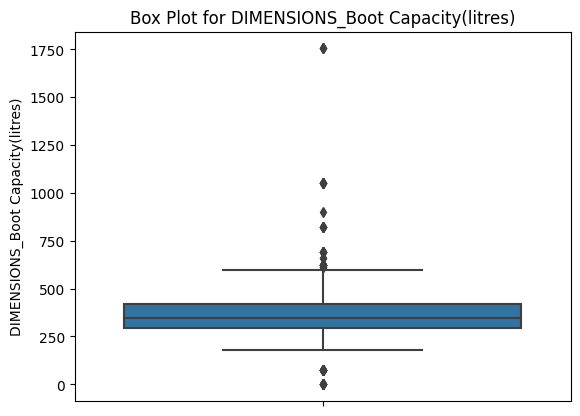

Analyzing column: ENGINE/MOTOR_Engine Displacement(cc)


<Axes: ylabel='ENGINE/MOTOR_Engine Displacement(cc)'>

Text(0.5, 1.0, 'Box Plot for ENGINE/MOTOR_Engine Displacement(cc)')

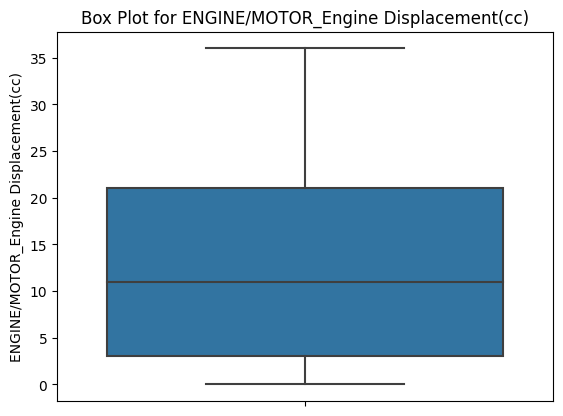

Analyzing column: FUEL ECONOMY/RANGE_Fuel Tank Capacity


<Axes: ylabel='FUEL ECONOMY/RANGE_Fuel Tank Capacity'>

Text(0.5, 1.0, 'Box Plot for FUEL ECONOMY/RANGE_Fuel Tank Capacity')

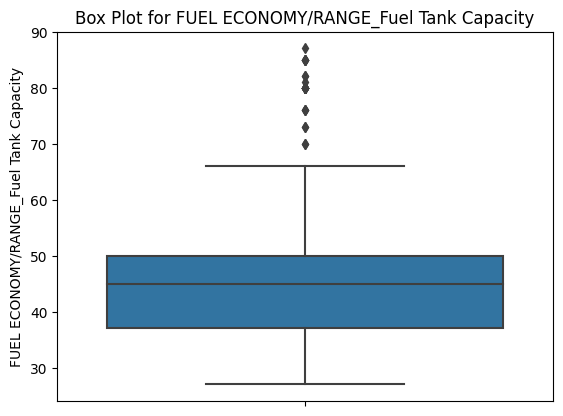

Analyzing column: FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)


<Axes: ylabel='FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)'>

Text(0.5, 1.0, 'Box Plot for FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)')

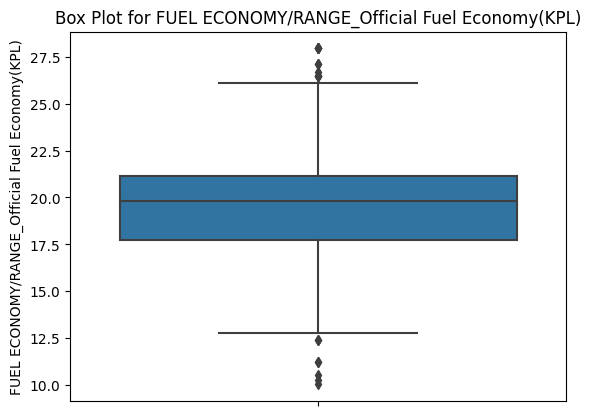

Analyzing column: STEERING_Turning Radius(m)


<Axes: ylabel='STEERING_Turning Radius(m)'>

Text(0.5, 1.0, 'Box Plot for STEERING_Turning Radius(m)')

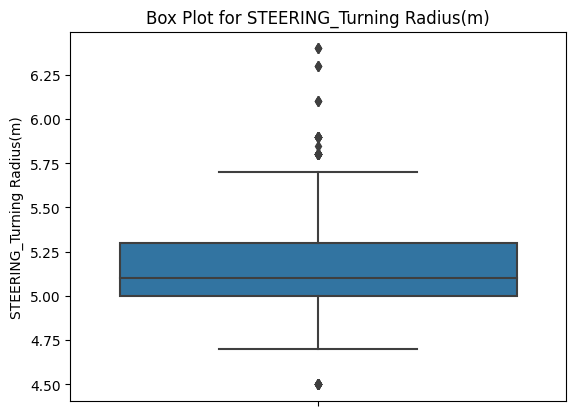

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
for column in df_noncat.columns:
    print(f"Analyzing column: {column}")
 # Outlier Detection
    if np.issubdtype(df_noncat[column].dtype, np.number):
        sns.boxplot(y=df_noncat[column])
        plt.title(f'Box Plot for {column}')
        plt.show()

In [ ]:
df_noncat.shape

(783, 12)

In [ ]:
missing_percent = (df_noncat.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percent[missing_percent > 80].index
df_noncat.drop(columns=columns_to_drop, inplace=True)

In [ ]:
missing_percent = (dropped_cat.isnull().sum() / len(df)) * 100
columns_to_drop = missing_percent[missing_percent > 80].index
dropped_cat.drop(columns=columns_to_drop, inplace=True)

In [ ]:
Cat = dropped_cat.fillna(0, inplace=True)

In [ ]:
Cat

In [ ]:
dropped_cat.isna().sum()

ENGINE/MOTOR_Engine Installation             0
TRANSMISSION_Gearbox Type                    0
TRANSMISSION_Number Of Gears                 0
TRANSMISSION_Selectable Differential Lock    0
SUSPENSION_Front Springs                     0
                                            ..
Part-leather                                 0
Part-leatherette                             0
Semi-Fabric                                  0
Suede                                        0
Vinyl                                        0
Length: 182, dtype: int64

In [ ]:
median_values = df_noncat.median()
df_filled = df_noncat.fillna(median_values)

In [ ]:
df_filled.isna().sum()

Price(Rs)                                        0
DIMENSIONS_Width(mm)                             0
DIMENSIONS_Height(mm)                            0
DIMENSIONS_Wheelbase(mm)                         0
 DIMENSIONS_Ground Clearance(mm)                 0
Kerb Weight Min                                  0
Kerb Weight Max                                  0
DIMENSIONS_Boot Capacity(litres)                 0
ENGINE/MOTOR_Engine Displacement(cc)             0
FUEL ECONOMY/RANGE_Fuel Tank Capacity            0
FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)    0
STEERING_Turning Radius(m)                       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
dropped_cat = dropped_cat.astype(str)
df = dropped_cat

In [ ]:
df

,ENGINE/MOTOR_Engine Installation,TRANSMISSION_Gearbox Type,TRANSMISSION_Number Of Gears,TRANSMISSION_Selectable Differential Lock,SUSPENSION_Front Springs,SUSPENSION_Rear Springs,SUSPENSION_Damper Control,SUSPENSION_Ride Height Adjust,STEERING_Steering Adjust,STEERING_Steering Adjust Type,...,Leather,Leather and Alcantara,Leather and Leatherette,Leatherette,Leatherette and Fabric,Part-leather,Part-leatherette,Semi-Fabric,Suede,Vinyl
0,Front,Dual-Clutch Auto,7,NO,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,1,0,0,0,0,0,0,0
1,Front,Dual-Clutch Auto,7,NO,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,1,0,0,0,0,0,0,0
2,Front,Torque Converter Auto,8,NO,Coil Springs,Coil Springs,YES,NO,Tilt and Telescopic,Manual,...,0,1,0,0,0,0,0,0,0,0
3,Front,Torque Converter Auto,8,NO,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,1,0,0,0,0,0,0,0,0
4,Front,Dual-Clutch Auto,7,NO,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Front,Torque Converter Auto,6,YES,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,0,0,0,0,0,0,0,0
779,Front,Manual,6,YES,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,0,0,0,0,0,0,0,0
780,Front,Torque Converter Auto,6,YES,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,0,0,0,1,0,0,0,0
781,Front,Manual,6,YES,Coil Springs,Coil Springs,NO,NO,Tilt and Telescopic,Manual,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
dropped_cat = dropped_cat.astype(str)
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(dropped_cat)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=encoder.get_feature_names_out(input_features=dropped_cat.columns))

In [ ]:
data = pd.concat([df_filled, encoded_df], axis=1)
data
test=data

,Price(Rs),DIMENSIONS_Width(mm),DIMENSIONS_Height(mm),DIMENSIONS_Wheelbase(mm),DIMENSIONS_Ground Clearance(mm),Kerb Weight Min,Kerb Weight Max,DIMENSIONS_Boot Capacity(litres),ENGINE/MOTOR_Engine Displacement(cc),FUEL ECONOMY/RANGE_Fuel Tank Capacity,...,Part-leather_0,Part-leather_1,Part-leatherette_0,Part-leatherette_1,Semi-Fabric_0,Semi-Fabric_1,Suede_0,Suede_1,Vinyl_0,Vinyl_1
0,5567000.0,1847,1433,2819.0,187.0,1550.0,1550.0,460.0,15,54.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,6004000.0,1847,1433,2819.0,187.0,1555.0,1555.0,460.0,15,54.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,13000000.0,1866,1387,2826.0,187.0,1810.0,1810.0,465.0,29,58.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,8763000.0,1845,1390,2825.0,187.0,1760.0,1760.0,465.0,30,58.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,6302000.0,1886,1457,2924.0,187.0,1780.0,1780.0,530.0,15,73.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1711000.0,1752,1507,2651.0,179.0,1225.0,1225.0,1050.0,35,45.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
779,1560000.0,1752,1507,2651.0,179.0,1190.0,1190.0,1050.0,35,45.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
780,1886000.0,1752,1507,2651.0,179.0,1245.0,1245.0,1050.0,35,45.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
781,1736000.0,1752,1507,2651.0,179.0,1290.0,1290.0,1050.0,35,45.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
test

,Price(Rs),DIMENSIONS_Width(mm),DIMENSIONS_Height(mm),DIMENSIONS_Wheelbase(mm),DIMENSIONS_Ground Clearance(mm),Kerb Weight Min,Kerb Weight Max,DIMENSIONS_Boot Capacity(litres),ENGINE/MOTOR_Engine Displacement(cc),FUEL ECONOMY/RANGE_Fuel Tank Capacity,...,Part-leather_0,Part-leather_1,Part-leatherette_0,Part-leatherette_1,Semi-Fabric_0,Semi-Fabric_1,Suede_0,Suede_1,Vinyl_0,Vinyl_1
0,5567000.0,1847,1433,2819.0,187.0,1550.0,1550.0,460.0,15,54.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,6004000.0,1847,1433,2819.0,187.0,1555.0,1555.0,460.0,15,54.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,13000000.0,1866,1387,2826.0,187.0,1810.0,1810.0,465.0,29,58.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,8763000.0,1845,1390,2825.0,187.0,1760.0,1760.0,465.0,30,58.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,6302000.0,1886,1457,2924.0,187.0,1780.0,1780.0,530.0,15,73.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,1711000.0,1752,1507,2651.0,179.0,1225.0,1225.0,1050.0,35,45.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
779,1560000.0,1752,1507,2651.0,179.0,1190.0,1190.0,1050.0,35,45.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
780,1886000.0,1752,1507,2651.0,179.0,1245.0,1245.0,1050.0,35,45.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
781,1736000.0,1752,1507,2651.0,179.0,1290.0,1290.0,1050.0,35,45.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [ ]:

column_names = data.columns

# Convert column names to a string with single inverted quotes and comma separation
column_names_str = ', '.join([f"'{col}'" for col in column_names])

# Print the result
print(column_names_str)


'Price(Rs)', 'DIMENSIONS_Width(mm)', 'DIMENSIONS_Height(mm)', 'DIMENSIONS_Wheelbase(mm)', ' DIMENSIONS_Ground Clearance(mm)', 'Kerb Weight Min', 'Kerb Weight Max', 'DIMENSIONS_Boot Capacity(litres)', 'ENGINE/MOTOR_Engine Displacement(cc)', 'FUEL ECONOMY/RANGE_Fuel Tank Capacity', 'FUEL ECONOMY/RANGE_Official Fuel Economy(KPL)', 'STEERING_Turning Radius(m)', 'ENGINE/MOTOR_Engine Installation_0', 'ENGINE/MOTOR_Engine Installation_Front', 'TRANSMISSION_Gearbox Type_1-speed Auto', 'TRANSMISSION_Gearbox Type_7-speed Dual-Clutch Auto', 'TRANSMISSION_Gearbox Type_AMT Auto', 'TRANSMISSION_Gearbox Type_Auto', 'TRANSMISSION_Gearbox Type_CVT', 'TRANSMISSION_Gearbox Type_CVT Auto', 'TRANSMISSION_Gearbox Type_Clutchless Manual', 'TRANSMISSION_Gearbox Type_Dual-Clutch Auto', 'TRANSMISSION_Gearbox Type_IMT', 'TRANSMISSION_Gearbox Type_Manual', 'TRANSMISSION_Gearbox Type_Single speed', 'TRANSMISSION_Gearbox Type_Torque Converter Auto', 'TRANSMISSION_Gearbox Type_e-CVT', 'TRANSMISSION_Gearbox Type_e-CV

In [ ]:
y = data.pop('Price(Rs)')

In [ ]:
y

0       5567000.0
1       6004000.0
2      13000000.0
3       8763000.0
4       6302000.0
          ...    
778     1711000.0
779     1560000.0
780     1886000.0
781     1736000.0
782     2160000.0
Name: Price(Rs), Length: 783, dtype: float64

In [ ]:
X = data.select_dtypes(exclude = ['object'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.35,
                                                    shuffle = True)

In [ ]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(508, 534)

(275, 534)

(508,)

(275,)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
rf_regressor = RandomForestRegressor(n_jobs=3)
scaler = StandardScaler()
steps_rf = [('scaler', scaler),
            ('pca', PCA()),
            ('rf', rf_regressor)]
pipe_rf = Pipeline(steps_rf)
parameters_rf = {'rf__n_estimators': [800, 900],
                 'rf__max_depth': [4, 8],
                 'pca__n_components': [100]}
scoring = make_scorer(mean_squared_error, greater_is_better=False)
clf_rf = GridSearchCV(pipe_rf,
                      parameters_rf,
                      n_jobs=2,
                      cv=5,
                      verbose=3,
                      scoring=scoring,
                      refit=True,
                      error_score='raise')

In [ ]:
print("\n\n--Takes time...---\n")
start = time.time()
#clf_rf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60



--Takes time...---




7.232030232747396e-07

In [ ]:
clf_rf.fit(X_train, y_train)
feature_importances = clf_rf.best_estimator_.named_steps['rf'].feature_importances_
importance_tuples = [(feature, importance) for feature, importance in zip(X_train.columns, feature_importances)]
importance_tuples.sort(key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(importance_tuples, columns=['Feature', 'Importance'])
print(importance_df.head(50))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('rf',
                                        RandomForestRegressor(n_jobs=3))]),
             n_jobs=2,
             param_grid={'pca__n_components': [100], 'rf__max_depth': [4, 8],
                         'rf__n_estimators': [800, 900]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=3)

                                              Feature  Importance
0                     DIMENSIONS_Ground Clearance(mm)    0.366399
1                                DIMENSIONS_Width(mm)    0.274691
2                                     Kerb Weight Max    0.068151
3                               DIMENSIONS_Height(mm)    0.039803
4                                     Kerb Weight Min    0.027582
5                            DIMENSIONS_Wheelbase(mm)    0.018329
6               FUEL ECONOMY/RANGE_Fuel Tank Capacity    0.015428
7              TRANSMISSION_Gearbox Type_Single speed    0.014688
8                ENGINE/MOTOR_Engine Displacement(cc)    0.010245
9                  TRANSMISSION_Gearbox Type_CVT Auto    0.009530
10                    TRANSMISSION_Gearbox Type_e-CVT    0.009223
11        TRANSMISSION_Gearbox Type_Clutchless Manual    0.008662
12             ENGINE/MOTOR_Engine Installation_Front    0.008425
13                     TRANSMISSION_Gearbox Type_Auto    0.007519
14        

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print(f"Best score: {clf_rf.best_score_}")
print(f"Best parameter set: {clf_rf.best_params_}")
y_pred = clf_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared (Coefficient of Determination): {r2}")


Best score: -890880166036.4293
Best parameter set: {'pca__n_components': 100, 'rf__max_depth': 8, 'rf__n_estimators': 900}
Mean Squared Error: 1797612373561.6519
R-squared (Coefficient of Determination): 0.7505213035361327
